## 6. Neural Scaling 
- This notebook shows how we mapped the GPT-4 scaling figure to a log axis for eaiser comparison to other plots in the chapter

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib.transforms import Bbox
from pathlib import Path

In [2]:
im=cv2.imread('data/gpt_4_codebase_loss_curve_alone.png')[:,:,(2,1,0)]

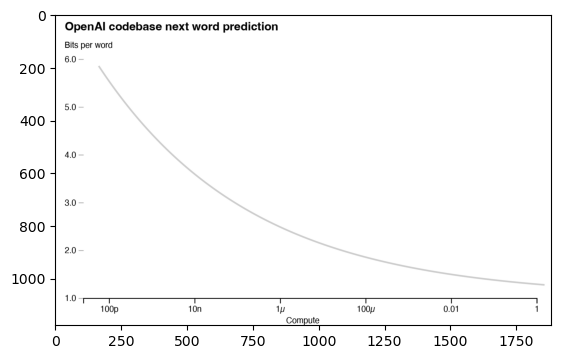

In [3]:
plt.imshow(im)

In [4]:
p1=[1075, 205] #origin
p2=[1075, 1830] #x value of "1 compute" - lol
p3=[171, 205] #6 bits per word

xfit=range(p1[1], p2[1])
yfit=[]
for col_index in xfit:
    col=im[p3[0]:(p1[0]-25), col_index]
    yfit.append(np.argmin(col.sum(1))+p3[0])

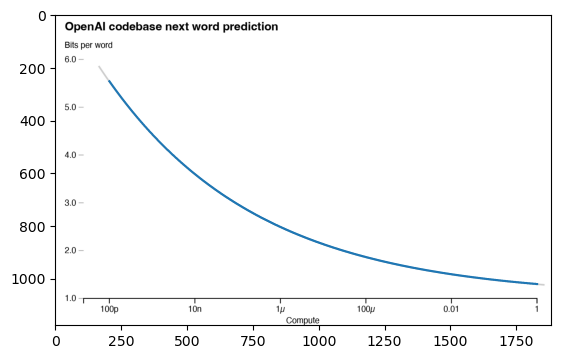

In [5]:
plt.imshow(im)
plt.plot(xfit,yfit)

In [10]:
yfit_scaled=5*(1075-np.array(yfit))/(1075-171)+1 
ys=np.log10(yfit_scaled)
yticks=np.log10(np.array([1+1e-9,2,3,4,5,6]))

<Figure size 640x480 with 0 Axes>

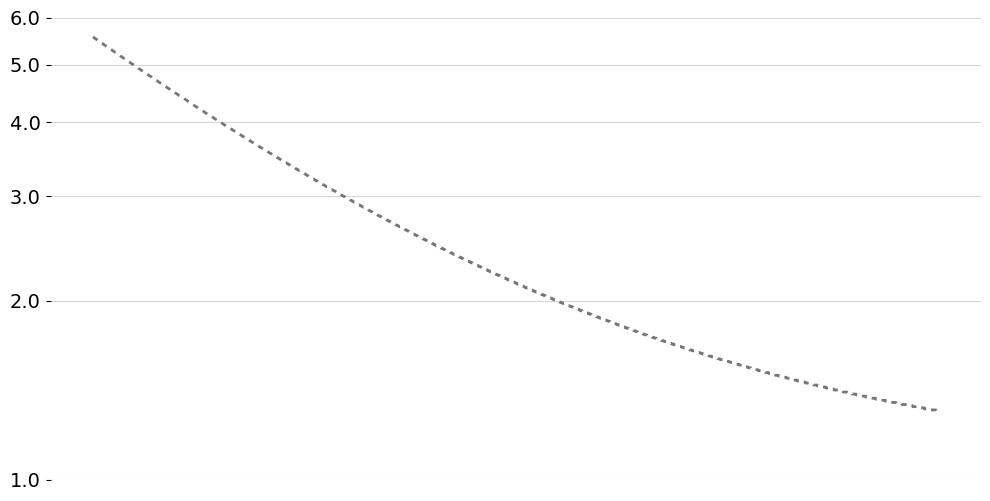

In [21]:
plt.clf()
fig=plt.figure(0,(12,6), facecolor='w')
ax=fig.add_subplot(111, facecolor='w')

plt.plot(ys, c='#777777', linewidth=2, linestyle=(0, (2, 2)))

plt.yticks(yticks, ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0'], fontsize=14, color='k')
plt.tick_params(axis='y', colors='k')
plt.xticks([])
plt.grid(1, alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('/Users/stephen/Stephencwelch Dropbox/welch_labs/ai_book/6_neural_scaling/graphics/gpt4_log_axis_.svg', bbox_inches='tight')